# 因子组合 HOMINGPIGEON和INVERTEDHAMMER组合

Initialize dataview success.
symbol               BTCUSDT:binance
trade_date                          
2018-02-14 18:00:00            100.0
2018-03-06 19:00:00            100.0
2018-08-27 10:00:00            100.0
2018-09-10 21:00:00            100.0


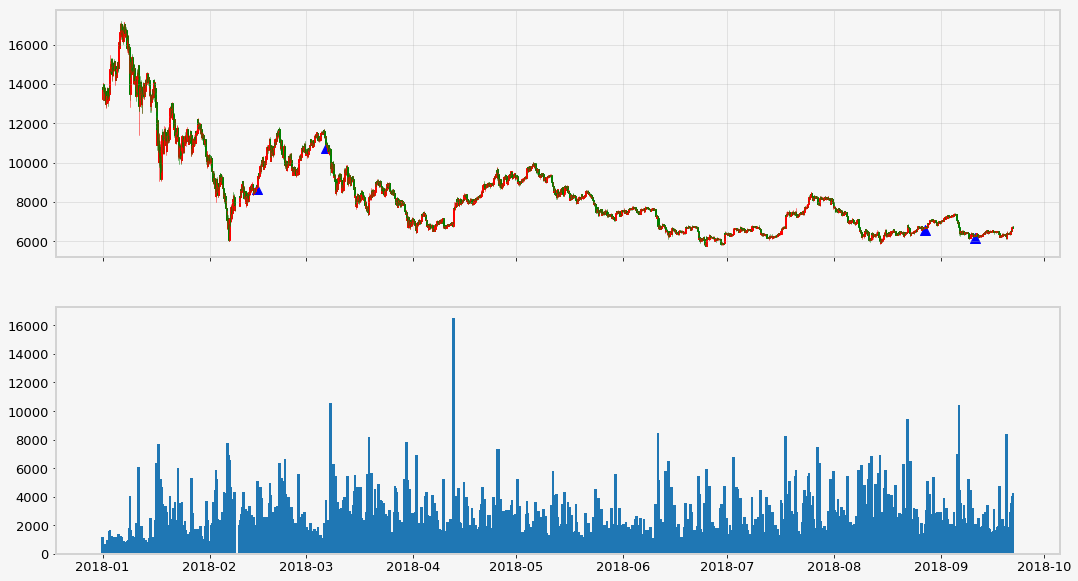

In [104]:
import warnings

warnings.filterwarnings('ignore')
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20160901000000}

Time_dict = ds.bar_reader(path,props)
data1H = Time_dict.set_index('datetime')


from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()
dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))


import matplotlib.pyplot as plt
import matplotlib.finance as mpf

def draw_candle(candle, scatterX, scatterY):
    fig, (ax, ax1) = plt.subplots(2,1,sharex=True, figsize=(18,10))
    ax.grid(True)
    mpf.candlestick_ohlc(ax, candle, width=0.3, colorup='r', colordown='g',alpha=1.0)
    ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.xaxis_date ()
    ax1.bar(data1H.index, data1H.volume)
    plt.show()

    
HOMINGPIGEON = dv1H.add_formula('HOMINGPIGEON', "If((Ta('CDLHOMINGPIGEON', 0, open, high, low, close, volume)==100),100,0)", add_data=True)
HOMINGPIGEONVolume = dv1H.get_ts('HOMINGPIGEON', date_type='datetime')
print(HOMINGPIGEONVolume[HOMINGPIGEONVolume['BTCUSDT:binance']==100])


HOMINGPIGEONVolumeX = HOMINGPIGEONVolume[HOMINGPIGEONVolume['BTCUSDT:binance']==100].index
HOMINGPIGEONVolumeY = data1H.loc[HOMINGPIGEONVolumeX].low-100


from matplotlib.pylab import date2num

data1H['candleTime'] = list(map(date2num, data1H.index))
candle = data1H.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values

draw_candle(candle, HOMINGPIGEONVolumeX, HOMINGPIGEONVolumeY)

symbol               BTCUSDT:binance
trade_date                          
2018-01-04 03:00:00            100.0
2018-01-06 16:00:00            100.0
2018-01-12 00:00:00            100.0
2018-01-15 22:00:00            100.0
2018-01-17 09:00:00            100.0
2018-01-18 12:00:00            100.0
2018-01-21 11:00:00            100.0
2018-01-26 00:00:00            100.0
2018-01-29 02:00:00            100.0
2018-02-06 10:00:00            100.0
2018-02-24 12:00:00            100.0
2018-03-07 02:00:00            100.0
2018-03-14 10:00:00            100.0
2018-03-22 14:00:00            100.0
2018-03-26 16:00:00            100.0
2018-04-16 00:00:00            100.0
2018-04-29 12:00:00            100.0
2018-05-25 22:00:00            100.0
2018-06-17 13:00:00            100.0
2018-07-13 17:00:00            100.0
2018-07-27 10:00:00            100.0
2018-07-31 11:00:00            100.0
2018-08-10 18:00:00            100.0
2018-08-22 18:00:00            100.0
2018-09-07 11:00:00            100.0
2

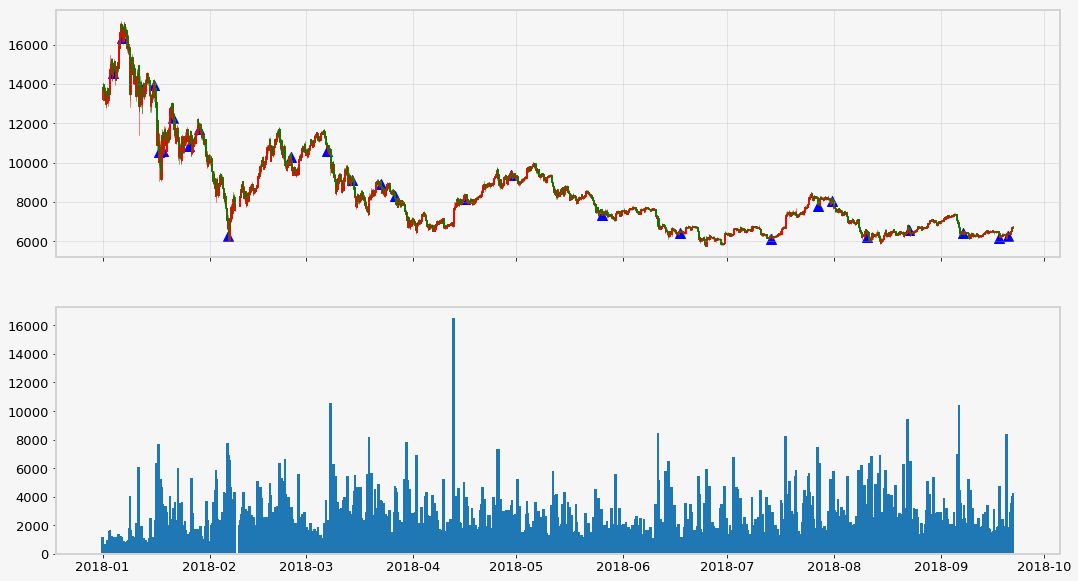

In [105]:
INVERTEDHAMMER = dv1H.add_formula('INVERTEDHAMMER', "If((Ta('CDLINVERTEDHAMMER', 0, open, high, low, close, volume)==100),100,0)", add_data=True)

INVERTEDHAMMERVolume = dv1H.get_ts('INVERTEDHAMMER', date_type='datetime')

print(INVERTEDHAMMERVolume[INVERTEDHAMMERVolume['BTCUSDT:binance']==100])

INVERTEDHAMMERVolumeX = INVERTEDHAMMERVolume[INVERTEDHAMMERVolume['BTCUSDT:binance']==100].index
INVERTEDHAMMERVolumeY = data1H.loc[INVERTEDHAMMERVolumeX].low-100

draw_candle(candle, INVERTEDHAMMERVolumeX,INVERTEDHAMMERVolumeY)

【HOMINGPIGEON思考】
HOMINGPIGEON因子代入:If((Ta('CDLHOMINGPIGEON', 0, open, high, low, close, volume)==100),100,0)
思考：观察图1、图2可知：HOMINGPIGEON极可能为反转信号。 HOMINGPIGEON信号出现时将会有快速的趋势反转，在本研究阶段后跟close的短暂上涨。故作为多头进场信号。（感觉跟成交量好像没关系）

【INVERTEDHAMMER思考】
INVERTEDHAMMER因子代入:If((Ta('CDLINVERTEDHAMMER', 0, open, high, low, close, volume)==100),100,0)
思考：观察上两图可知：INVERTEDHAMMER在本研究阶段后紧跟close的下降，猜测是下降趋势信号，故作为空头进场信号。（感觉跟成交量好像也没关系）


【信号与进出场条件设置】 long进场：出现HOMINGPIGEON信号。long出场：short不可进场 short进场：alpha7小于0（基本表示close突然下降）且前一close数值为0。 long出场：short不可进场时。 short进场：出现INVERTEDHAMMER信号。short出场：long不可进场时

In [106]:
# 设定进出场条件
long = dv1H.add_formula('longCandle',"If((Ta('CDLHOMINGPIGEON', 0, open, high, low, close, volume)==100) ,2,0)", add_data=True)
short = dv1H.add_formula("shortCandle","If((Ta('CDLINVERTEDHAMMER', 0, open, high, low, close, volume)==100),-2,0)", add_data=True)
close_long = dv1H.add_formula("closeLongCandle","If(shortCandle==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShortCandle","If(longCandle==2,-1,0)", add_data=True)

#计算绩效
from jaqs_fxdayu.research import TimingDigger

tdCandle= TimingDigger(output_folder=".", output_format='pdf',signal_name='Candle')
def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )
TimingSignal(tdCandle, dv1H,'longCandle','shortCandle','closeLongCandle','closeShortCandle', 100, 0.05, 0.3)
tdCandle.create_event_report(sig_type="long_short")

Nan Data Count (should be zero) : 0;  Percentage of effective data: 0%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 0%
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               4.887  -7.494   2.027
p-value              0.000   0.000   0.052
mean                 0.106  -0.046   0.037
std                  0.087   0.022   0.100
info_ratio           1.222  -2.078   0.370
skewness             0.614   0.353   0.919
kurtosis            -0.635  -0.384  -0.112
pct5                 0.003  -0.073  -0.065
pct25                0.026  -0.057  -0.052
pct50                0.080  -0.053   0.003
pct75                0.171  -0.033   0.088
pct95                0.239  -0.010   0.206
occurance           17.000  14.000  31.000
win_ratio              NaN     NaN   0.548
win_mean/loss_mean     NaN     NaN   2.287


In [107]:
tdCandle.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win      loss    all
t-stat              1.655       NaN  1.318
p-value             0.240       NaN  0.279
mean                0.086 -0.020000  0.060
std                 0.074  0.000000  0.079
info_ratio          1.170      -inf  0.761
skewness            0.676  0.000000  0.855
kurtosis           -1.500 -3.000000 -0.847
pct5                0.027 -0.020000 -0.013
pct25               0.034 -0.020000  0.014
pct50               0.043 -0.020000  0.034
pct75               0.117 -0.020000  0.080
pct95               0.176 -0.020000  0.168
occurance           3.000  1.000000  4.000
win_ratio             NaN       NaN  0.750
win_mean/loss_mean    NaN       NaN  4.393


In [108]:
tdCandle.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               4.477  -7.679   1.676
p-value              0.001   0.000   0.106
mean                 0.110  -0.048   0.034
std                  0.089   0.022   0.103
info_ratio           1.242  -2.217   0.329
skewness             0.572   0.548   0.965
kurtosis            -0.619   0.047  -0.049
pct5                 0.003  -0.074  -0.065
pct25                0.031  -0.058  -0.053
pct50                0.088  -0.054   0.003
pct75                0.171  -0.037   0.088
pct95                0.251  -0.009   0.209
occurance           14.000  13.000  27.000
win_ratio              NaN     NaN   0.519
win_mean/loss_mean     NaN     NaN   2.276


EOS（这部分选取得研究时间不一样）

Initialize dataview success.
symbol               EOSUSDT:binance
trade_date                          
2018-06-15 21:00:00            100.0
2018-06-17 14:00:00            100.0
2018-06-28 11:00:00            100.0
2018-07-09 13:00:00            100.0
2018-08-07 10:00:00            100.0
2018-09-19 13:00:00            100.0


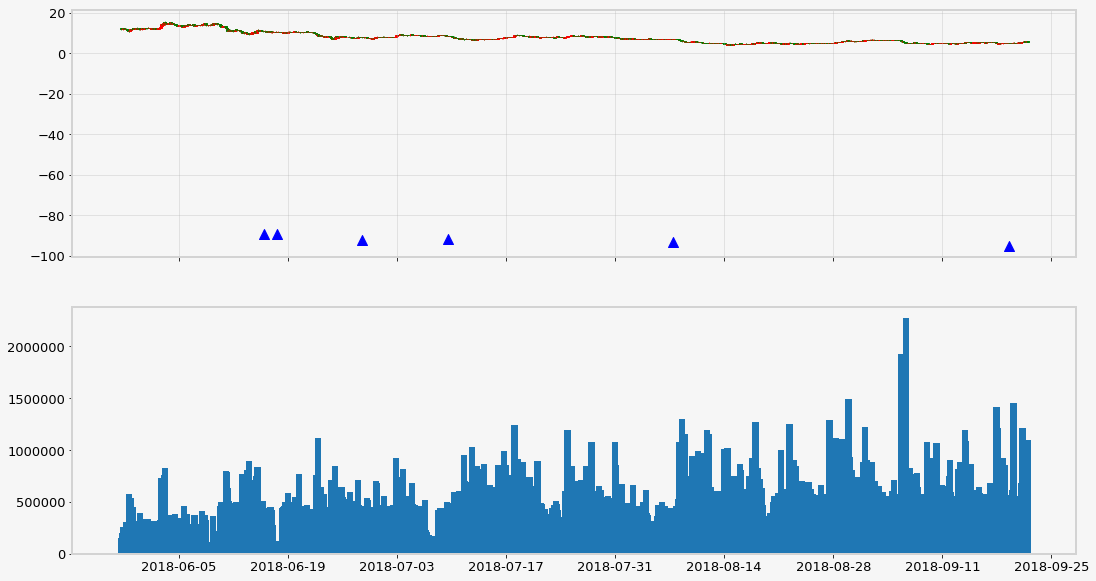

In [82]:
import warnings

warnings.filterwarnings('ignore')
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'EOSUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}

Time_dict = ds.bar_reader(path,props)
data2H = Time_dict.set_index('datetime')


from jaqs_fxdayu.data.hf_dataview import HFDataView

dv2H = HFDataView()
dv2H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))


import matplotlib.pyplot as plt
import matplotlib.finance as mpf

def draw_candle(candle, scatterX, scatterY):
    fig, (ax, ax1) = plt.subplots(2,1,sharex=True, figsize=(18,10))
    ax.grid(True)
    mpf.candlestick_ohlc(ax, candle, width=0.3, colorup='r', colordown='g',alpha=1.0)
    ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.xaxis_date ()
    ax1.bar(data2H.index, data2H.volume)
    plt.show()  
    

HOMINGPIGEON = dv2H.add_formula('HOMINGPIGEON', "If((Ta('CDLHOMINGPIGEON', 0, open, high, low, close, volume)==100),100,0)", add_data=True)
HOMINGPIGEONVolume = dv2H.get_ts('HOMINGPIGEON', date_type='datetime')
print(HOMINGPIGEONVolume[HOMINGPIGEONVolume['EOSUSDT:binance']==100])


HOMINGPIGEONVolumeX = HOMINGPIGEONVolume[HOMINGPIGEONVolume['EOSUSDT:binance']==100].index
HOMINGPIGEONVolumeY = data2H.loc[HOMINGPIGEONVolumeX].low-100


from matplotlib.pylab import date2num

data2H['candleTime'] = list(map(date2num, data2H.index))
candle = data2H.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values

draw_candle(candle, HOMINGPIGEONVolumeX, HOMINGPIGEONVolumeY)

symbol               EOSUSDT:binance
trade_date                          
2018-06-01 05:00:00            100.0
2018-06-09 12:00:00            100.0
2018-06-21 20:00:00            100.0
2018-06-29 00:00:00            100.0
2018-06-29 10:00:00            100.0
2018-07-01 11:00:00            100.0
2018-07-03 13:00:00            100.0
2018-07-11 21:00:00            100.0
2018-07-15 07:00:00            100.0
2018-07-24 10:00:00            100.0
2018-07-27 10:00:00            100.0
2018-08-28 09:00:00            100.0
2018-09-07 11:00:00            100.0
2018-09-08 03:00:00            100.0
2018-09-19 18:00:00            100.0


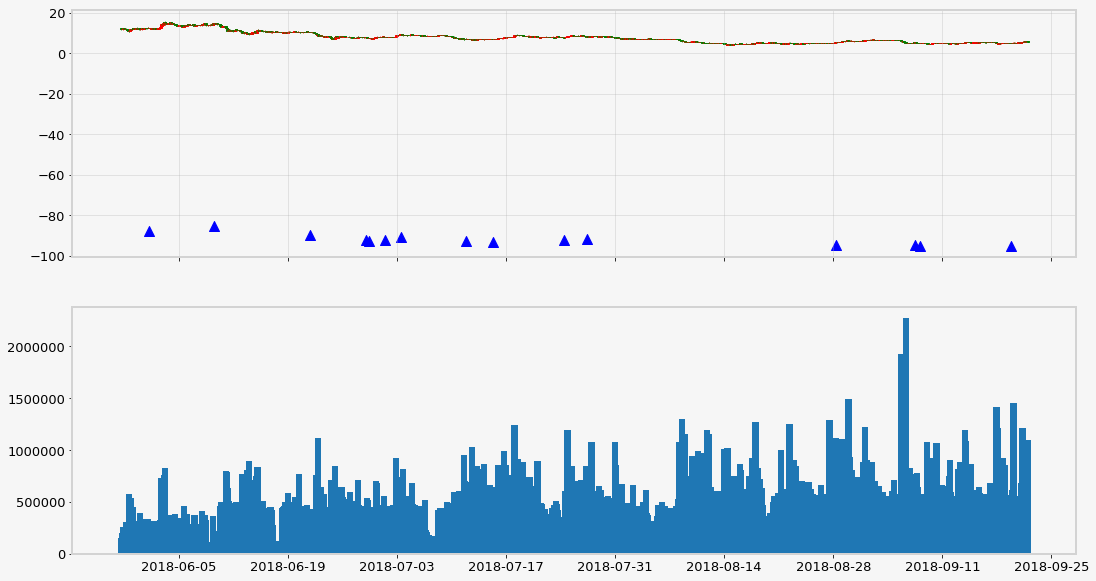

In [83]:
INVERTEDHAMMER = dv2H.add_formula('INVERTEDHAMMER', "If((Ta('CDLINVERTEDHAMMER', 0, open, high, low, close, volume)==100),100,0)", add_data=True)

INVERTEDHAMMERVolume = dv2H.get_ts('INVERTEDHAMMER', date_type='datetime')

print(INVERTEDHAMMERVolume[INVERTEDHAMMERVolume['EOSUSDT:binance']==100])

INVERTEDHAMMERVolumeX = INVERTEDHAMMERVolume[INVERTEDHAMMERVolume['EOSUSDT:binance']==100].index
INVERTEDHAMMERVolumeY = data2H.loc[INVERTEDHAMMERVolumeX].low-100

draw_candle(candle, INVERTEDHAMMERVolumeX,INVERTEDHAMMERVolumeY)

In [101]:
# 设定进出场条件
long = dv1H.add_formula('longCandle',"If((Ta('CDLHOMINGPIGEON', 0, open, high, low, close, volume)==100) ,2,0)", add_data=True)
short = dv1H.add_formula("shortCandle","If((Ta('CDLINVERTEDHAMMER', 0, open, high, low, close, volume)==100),-2,0)", add_data=True)
close_long = dv1H.add_formula("closeLongCandle","If(shortCandle==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShortCandle","If(longCandle==2,-1,0)", add_data=True)

#计算绩效
from jaqs_fxdayu.research import TimingDigger

tdCandle= TimingDigger(output_folder=".", output_format='pdf',signal_name='Candle')
def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )
TimingSignal(tdCandle, dv1H,'longCandle','shortCandle','closeLongCandle','closeShortCandle', 100, 0.05, 0.3)
tdCandle.create_event_report(sig_type="long_short")

Nan Data Count (should be zero) : 0;  Percentage of effective data: 2%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 1%
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               4.659 -14.516  -0.139
p-value              0.000   0.000   0.890
mean                 0.098  -0.054  -0.002
std                  0.092   0.023   0.092
info_ratio           1.069  -2.386  -0.018
skewness             1.293   0.722   1.810
kurtosis             0.336   0.810   3.072
pct5                 0.017  -0.088  -0.084
pct25                0.034  -0.061  -0.055
pct50                0.065  -0.054  -0.052
pct75                0.109  -0.052   0.034
pct95                0.307  -0.006   0.226
occurance           20.000  38.000  58.000
win_ratio              NaN     NaN   0.345
win_mean/loss_mean     NaN     NaN   1.809


In [98]:
tdCandle.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win    loss     all
t-stat              2.604 -12.188   0.405
p-value             0.048   0.000   0.692
mean                0.139  -0.070   0.014
std                 0.119   0.016   0.128
info_ratio          1.164  -4.309   0.108
skewness            0.665  -0.474   1.435
kurtosis           -1.499  -1.227   0.832
pct5                0.036  -0.094  -0.090
pct25               0.052  -0.083  -0.069
pct50               0.071  -0.062  -0.053
pct75               0.248  -0.056   0.058
pct95               0.307  -0.052   0.307
occurance           6.000   9.000  15.000
win_ratio             NaN     NaN   0.400
win_mean/loss_mean    NaN     NaN   1.996


In [102]:
tdCandle.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               3.648 -14.226  -0.671
p-value              0.003   0.000   0.506
mean                 0.084  -0.053  -0.008
std                  0.083   0.020   0.082
info_ratio           1.012  -2.688  -0.103
skewness             1.639   1.105   2.029
kurtosis             1.643   2.125   4.479
pct5                 0.016  -0.076  -0.074
pct25                0.028  -0.059  -0.055
pct50                0.055  -0.053  -0.052
pct75                0.091  -0.052   0.024
pct95                0.257  -0.005   0.125
occurance           14.000  29.000  43.000
win_ratio              NaN     NaN   0.326
win_mean/loss_mean     NaN     NaN   1.584
